In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imutils
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

In [2]:
source_path = 'data/garbage_classification_6_classes/garbage_classification/'

source_path_cardboard = os.path.join(source_path, 'cardboard')
source_path_glass = os.path.join(source_path, 'glass')
source_path_metal = os.path.join(source_path, 'metal')
source_path_paper = os.path.join(source_path, 'paper')
source_path_plastic = os.path.join(source_path, 'plastic')
source_path_trash = os.path.join(source_path, 'trash')

## Functios

In [3]:
def display_image(img, title=None):
    """ Function to display an image
    Args:
        1) img - image object
        2) title - the title that will be displayed above the image
    Returns:
        None; but displays an image
    """
    plt.imshow(img)
    plt.title(title)
    plt.show()

## View test data

In [4]:
image_filepaths = [source_path_cardboard, source_path_glass, source_path_metal, source_path_paper, source_path_plastic, 
                   source_path_trash]
image_filenames = ['cardboard148.jpg', 'glass93.jpg', 'metal69.jpg', 'paper104.jpg', 'plastic118.jpg',
                  'trash28.jpg']
show_images = False
images = []
for image_filepath, image_filename in zip(image_filepaths, image_filenames):
    img = cv2.imread(os.path.join(image_filepath, image_filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    
    if show_images:
        plt.imshow(img)
        plt.title(image_filename)
        plt.show()

## Perform image augmentation using ImageDataGenerator

In [5]:
# Get the size of the image (height, width)
img_height, img_width = img.shape[:2]
print(f"img_height = {img_height}, img_width = {img_width}")

img_height = 384, img_width = 512


In [26]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 3

augmented_index = 0
augmented_image_names = []

for (image_name, img) in zip(image_filenames, images):
    x = img.copy()
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        i += 1
        if i > num_augmented_images:
            augmented_index = 0
            break  # Break the loop after generating the desired number of augmented images
            
        # Create unique name for the augmented image (aug_originalfilename_index.jpg)
        augmented_image_name = f"aug_wshift_{image_name.split('.')[0]}_{augmented_index}.jpg"
        
        # Increment the index for the next augmented image
        augmented_index += 1
        # Save the augmented image with the unique name
        augmented_image_path = os.path.join(augmented_images_dir, augmented_image_name)
        augmented_image_names.append(augmented_image_path)
        # Save the augmented image
        tf.keras.preprocessing.image.save_img(augmented_image_path, batch[0])

## Perform image augmentation using cv2 algorithms 

In [7]:
# Get the size of the image (height, width)
img_height, img_width = img.shape[:2]
print(f"img_height = {img_height}, img_width = {img_width}")

img_height = 384, img_width = 512


### Rotation

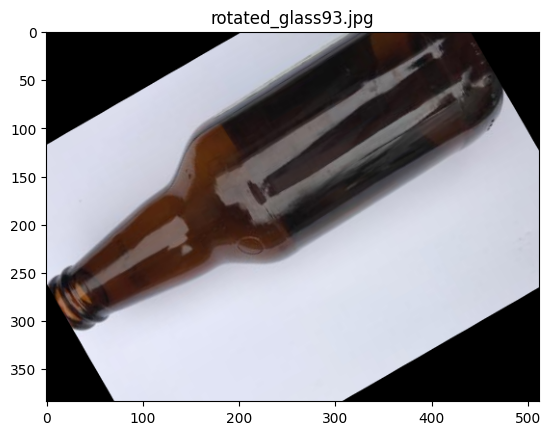

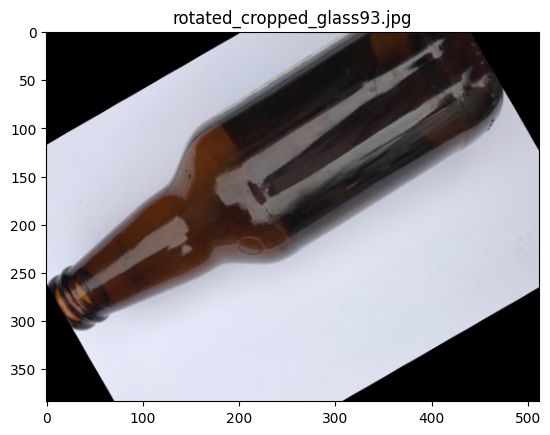

In [16]:
img_index = 1
img = images[img_index]
image_filename = image_filenames[img_index]

angle = 30

height, width = img.shape[:2]

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

# Apply the rotation to the image using warpAffine
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))

# Find non-zero pixels in the rotated image
non_zero_pixels = cv2.findNonZero(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY))

# Get the bounding box of non-zero pixels
x, y, w, h = cv2.boundingRect(non_zero_pixels)

# Adjust the bounding box coordinates for the rotated image
x_new = x - (width - w) // 2
y_new = y - (height - h) // 2

# Crop the rotated image to the adjusted bounding box
rotated_image_cropped = rotated_image[y_new:y_new+h, x_new:x_new+w]

# Display the rotated image as needed
display_image(rotated_image, title=f'rotated_{image_filename}')

# Display the rotated cropped image as needed
display_image(rotated_image_cropped, title=f'rotated_cropped_{image_filename}')

In [17]:
print(f'x = {x}, y = {y}, w = {w}, h = {h}')

x = 0, y = 0, w = 512, h = 384


### width_shift

In [34]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

augmented_index = 0
augmented_image_names = []

for (image_name, img) in zip(image_filenames, images):
    x = img.copy()
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        i += 1
        if i > num_augmented_images:
            augmented_index = 0
            break  # Break the loop after generating the desired number of augmented images
            
        # Create unique name for the augmented image (aug_originalfilename_index.jpg)
        augmented_image_name = f"aug_wshift_{image_name.split('.')[0]}_{augmented_index}.jpg"
        
        # Increment the index for the next augmented image
        augmented_index += 1
        # Save the augmented image with the unique name
        augmented_image_path = os.path.join(augmented_images_dir, augmented_image_name)
        augmented_image_names.append(augmented_image_path)
        # Save the augmented image
        tf.keras.preprocessing.image.save_img(augmented_image_path, batch[0])

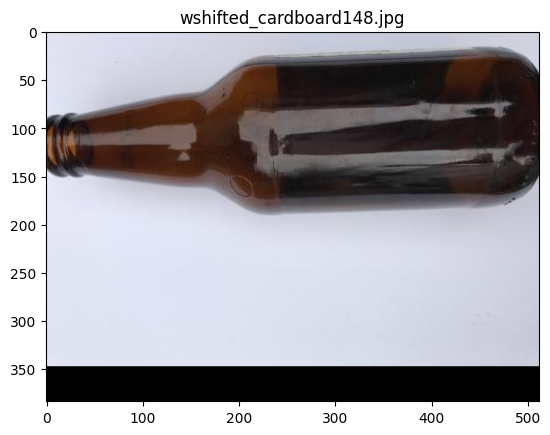

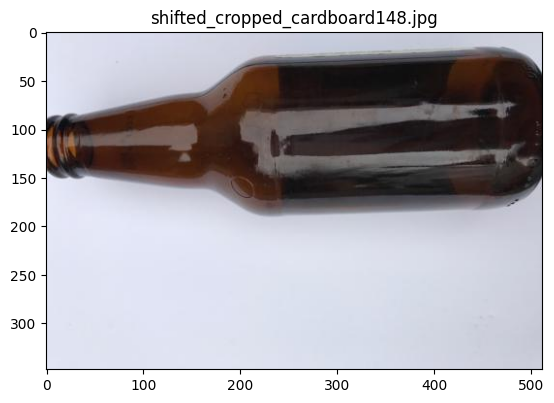

In [35]:
# Define the height shift fraction (a fraction of total height)
width_shift_fraction = 0.1  # Example: shift the image by 10% of total height

# Load your image
img = images[1]

# Get the height and width of the image
height, width = img.shape[:2]

# Calculate the height shift value
width_shift = int(height * width_shift_fraction)

# Generate a random height shift value within the specified range
random_width_shift = np.random.randint(-width_shift, width_shift + 1)

# Calculate the new y-coordinate for height shift
y_shifted = height // 2 + random_width_shift

# Calculate the rotation matrix for height shift
shift_matrix = np.float32([[1, 0, 0], [0, 1, random_width_shift]])

# Apply the height shift to the image using warpAffine
changed_image = cv2.warpAffine(img, shift_matrix, (width, height))

# Find non-zero pixels in the shifted image
non_zero_pixels = cv2.findNonZero(cv2.cvtColor(changed_image, cv2.COLOR_BGR2GRAY))

# Get the bounding box of non-zero pixels
x, y, w, h = cv2.boundingRect(non_zero_pixels)

# Crop the shifted image to the adjusted bounding box
changed_image_cropped = changed_image[y:y+h, x:x+w]

# Display the shifted image
display_image(changed_image, title=f'wshifted_{image_filename}')

# Display the shifted cropped image 
display_image(changed_image_cropped, title=f'shifted_cropped_{image_filename}')

### height_shift

In [30]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    height_shift_range=0.2,
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

augmented_index = 0
augmented_image_names = []

for (image_name, img) in zip(image_filenames, images):
    x = img.copy()
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        i += 1
        if i > num_augmented_images:
            augmented_index = 0
            break  # Break the loop after generating the desired number of augmented images
            
        # Create unique name for the augmented image (aug_originalfilename_index.jpg)
        augmented_image_name = f"aug_hshift_{image_name.split('.')[0]}_{augmented_index}.jpg"
        
        # Increment the index for the next augmented image
        augmented_index += 1
        # Save the augmented image with the unique name
        augmented_image_path = os.path.join(augmented_images_dir, augmented_image_name)
        augmented_image_names.append(augmented_image_path)
        # Save the augmented image
        tf.keras.preprocessing.image.save_img(augmented_image_path, batch[0])

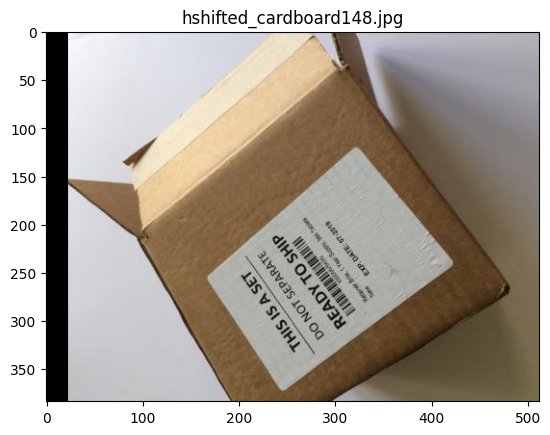

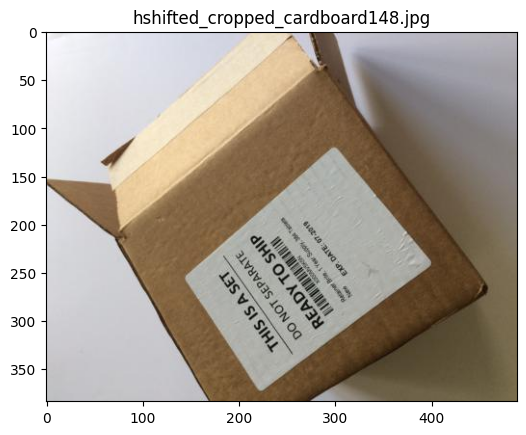

In [32]:
height_shift_fraction = 0.1

img_index = 0
img = images[img_index]
image_filename = image_filenames[img_index]
height, width = img.shape[:2]

# Calculate the height shift value
height_shift = int(width * height_shift_fraction)

# Generate a random height shift value within the specified range
random_height_shift = np.random.randint(-height_shift, height_shift + 1)

# Calculate the new x-coordinate for height shift
x_shifted = width // 2 + random_height_shift

# Calculate the rotation matrix for height shift
shift_matrix = np.float32([[1, 0, random_height_shift], [0, 1, 0]])

# Apply the height shift to the image using warpAffine
changed_image = cv2.warpAffine(img, shift_matrix, (width, height))

# Find non-zero pixels in the rotated image
non_zero_pixels = cv2.findNonZero(cv2.cvtColor(changed_image, cv2.COLOR_BGR2GRAY))

# Get the bounding box of non-zero pixels
x, y, w, h = cv2.boundingRect(non_zero_pixels)

# Crop the rotated image to the adjusted bounding box
changed_image_cropped = changed_image[y:y+h, x:x+w]

# Display the shifted image
display_image(changed_image, title=f'hshifted_{image_filename}')

# Display the shifted cropped image 
display_image(changed_image_cropped, title=f'hshifted_cropped_{image_filename}')